<a href="https://colab.research.google.com/github/Theayussh/data-Analytics-project-house-price-prediction/blob/main/House_price_prediction_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [ ]:
#Importing the dataset and performing data
housing = pd.read_csv('/content/Housing.csv')

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
housing.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [ ]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<Axes: xlabel='price', ylabel='area'>

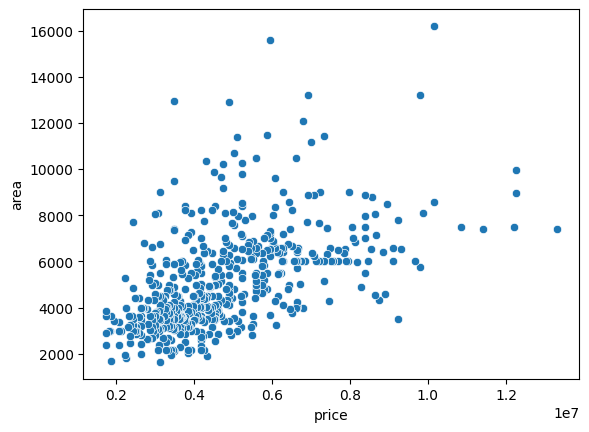

In [ ]:
sns.scatterplot(x=housing['price'], y=housing['area'])

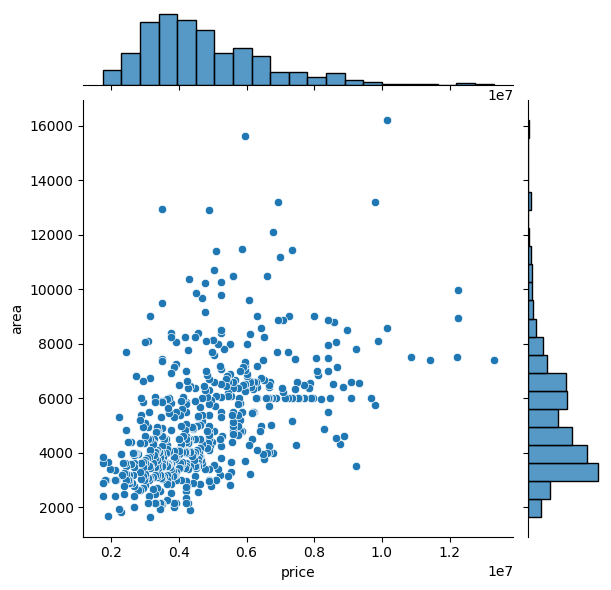

In [ ]:
sns.jointplot(data=housing, x='price', y='area', kind='scatter')
plt.show()

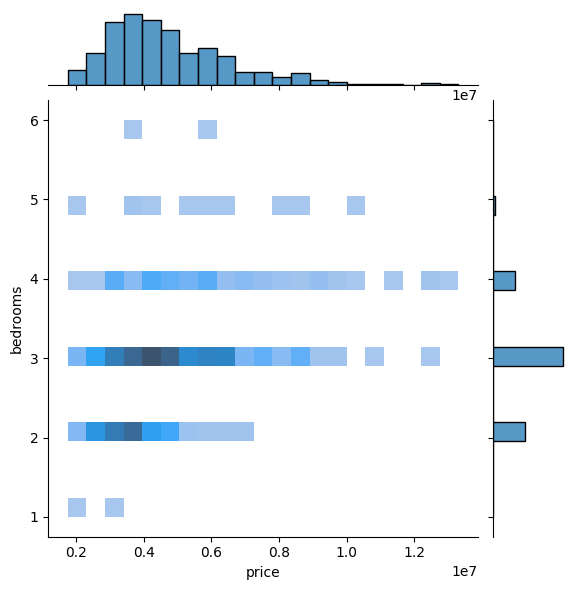

In [ ]:
sns.jointplot(data=housing, x='price', y='bedrooms', kind='hist')
plt.show()

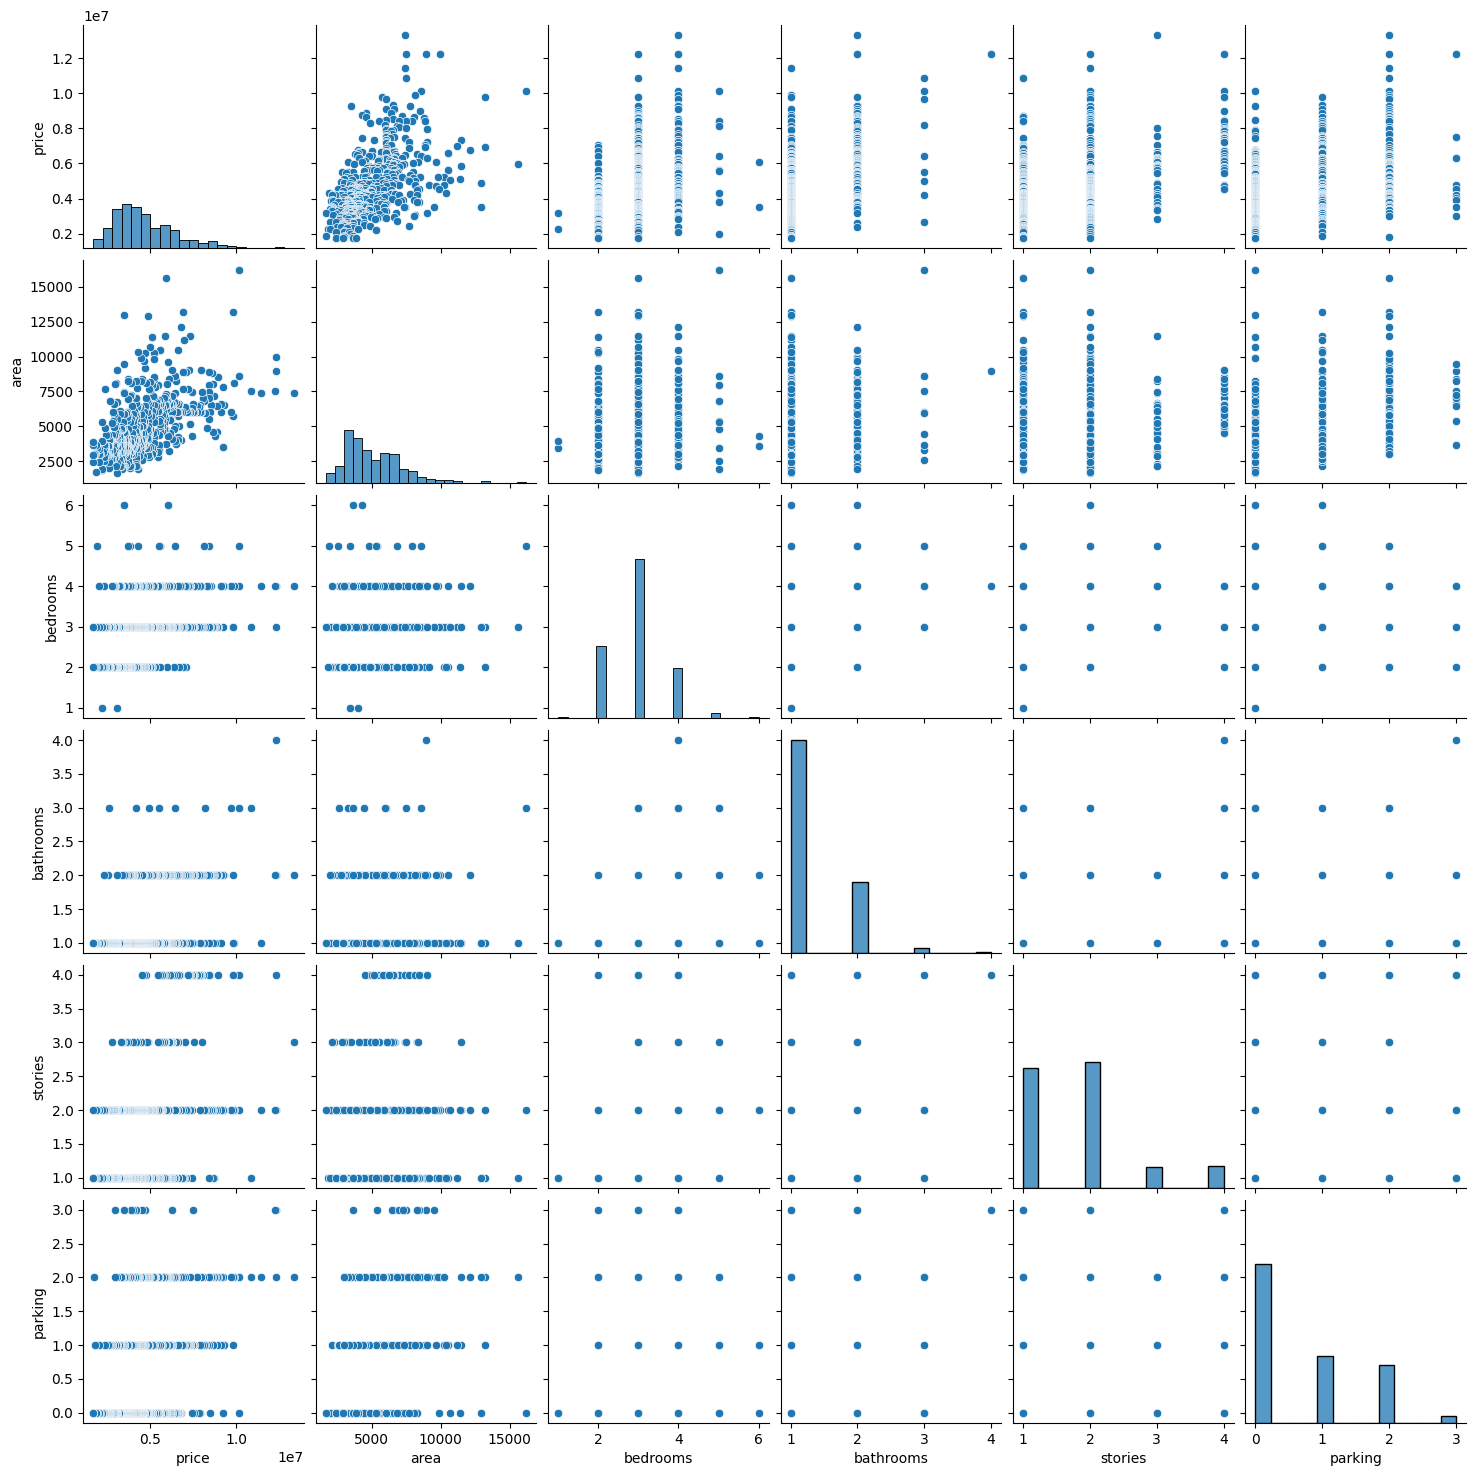

In [ ]:
sns.pairplot(housing)

EDA

In [ ]:
housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [ ]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
label = LabelEncoder()
col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in col:
  housing[i] = label.fit_transform(housing[i])

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<Axes: >

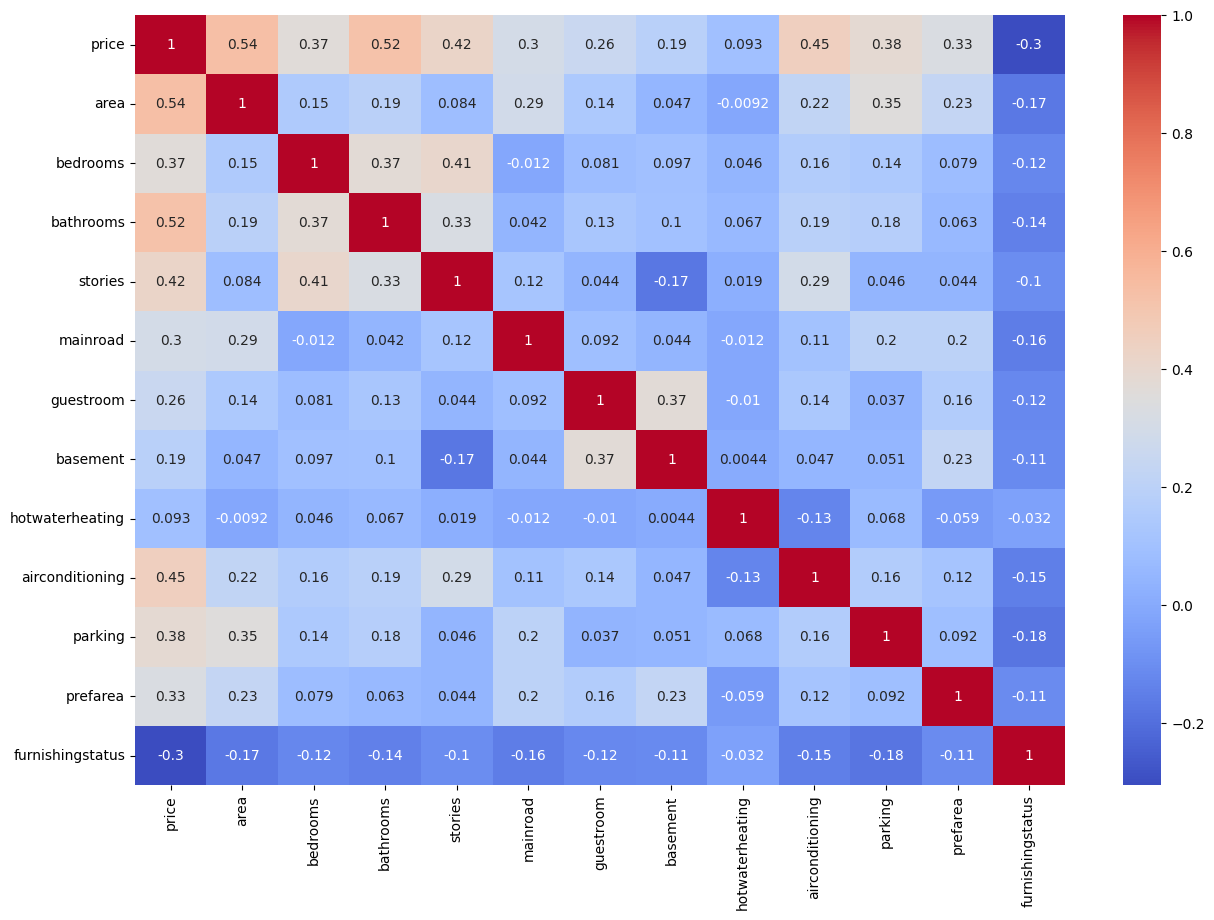

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr(),annot=True, cmap='coolwarm')

Splitting data into training and testing dat

In [ ]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
np.random.seed(0)

In [ ]:
housing_train, housing_test = train_test_split(housing,train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
print(housing.shape, housing_train.shape, housing_test.shape)

(545, 13) (436, 13) (109, 13)


In [ ]:
housing_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,0
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,0
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,0
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,0
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,1


In [ ]:
housing_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1


Scaling training data: MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
column_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
housing_train[column_scale] = scaler.fit_transform(housing_train[column_scale])

In [ ]:
y_train = housing_train.pop('price')
x_train = housing_train

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
coff = lr.coef_
print(coff)


[ 0.30047608  0.04051435  0.2957908   0.10548276  0.04985397  0.03322214
  0.02451744  0.0747097   0.07244916  0.06359298  0.05219298 -0.01899373]


In [ ]:
score = lr.score(x_train, y_train)
print(score)

0.6773324472457778


Scaling Test Data: MinMaxScaler

In [ ]:
column_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
housing_test[column_scale] = scaler.fit_transform(housing_test[column_scale])

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
y_test = housing_test.pop('price')
x_test = housing_test

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
r2 = r2_score(y_test, prediction)

In [ ]:
y_test.shape
y_test_matrix = y_test.values.reshape(-1, 1)

In [ ]:
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})

In [ ]:
data_frame.head(10)

,actual,predicted
0,0.248485,0.188887
1,0.531987,0.478661
2,0.329966,0.334079
3,0.262626,0.299183
4,0.246465,0.267235
5,0.276094,0.184743
6,0.646465,0.620699
7,0.329966,0.399524
8,0.087542,0.153469
9,0.397306,0.351689


Text(0, 0.5, 'Predicted')

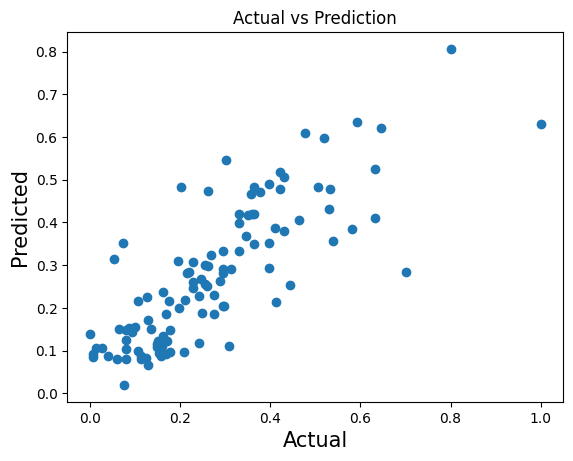

In [ ]:
fig = plt.figure()

plt.scatter(y_test, prediction)

plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.011751478262330032


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

In [ ]:
print(" Mean Squared Error:", knn_mse)
print(" R-squared:", knn_r2)

 Mean Squared Error: 0.010784774777178435
 R-squared: 0.6698211617914615


In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)

In [ ]:
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print(" Mean Squared Error:", dt_mse)
print(" R-squared:", dt_r2)

 Mean Squared Error: 0.022068157153137445
 R-squared: 0.32437731517164936


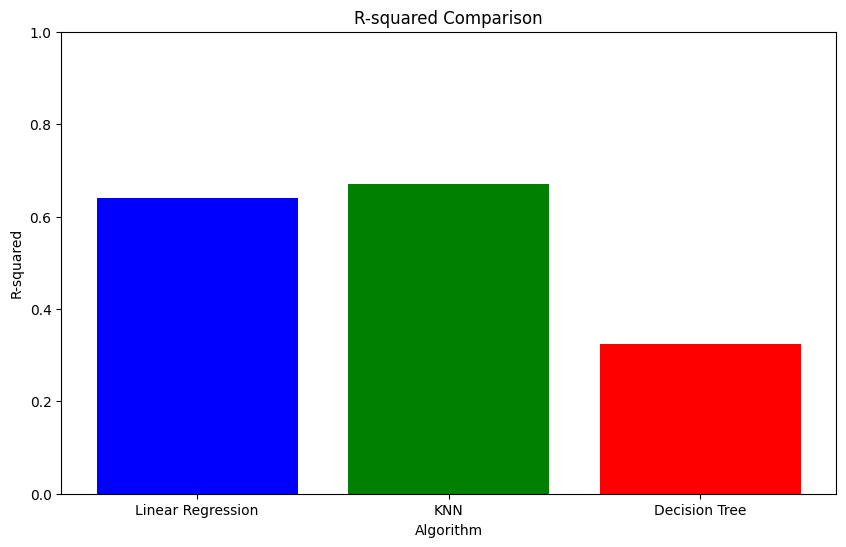

In [ ]:
algorithms = ['Linear Regression', 'KNN', 'Decision Tree']
r2_scores = [r2, knn_r2, dt_r2]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, r2_scores, color=['blue', 'green', 'red'])
plt.title('R-squared Comparison')
plt.xlabel('Algorithm')
plt.ylabel('R-squared')
plt.ylim(0, 1)
plt.show()

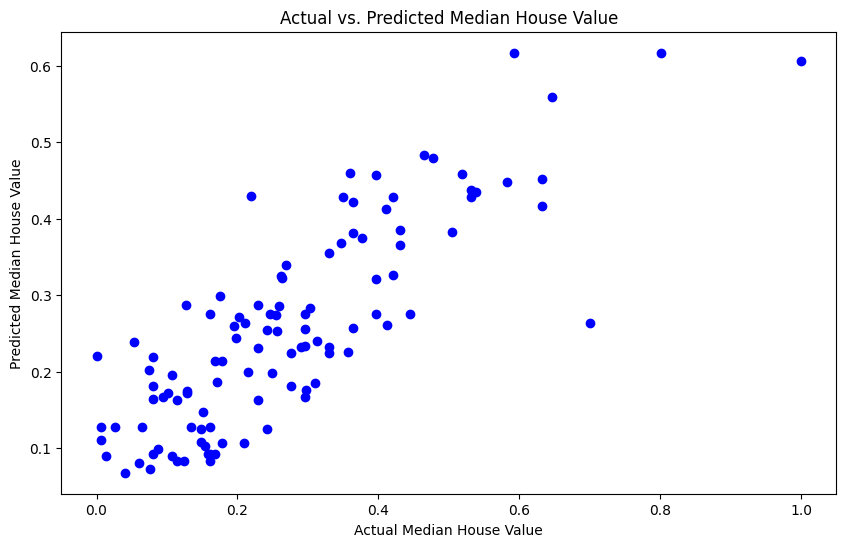

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, color='blue')
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

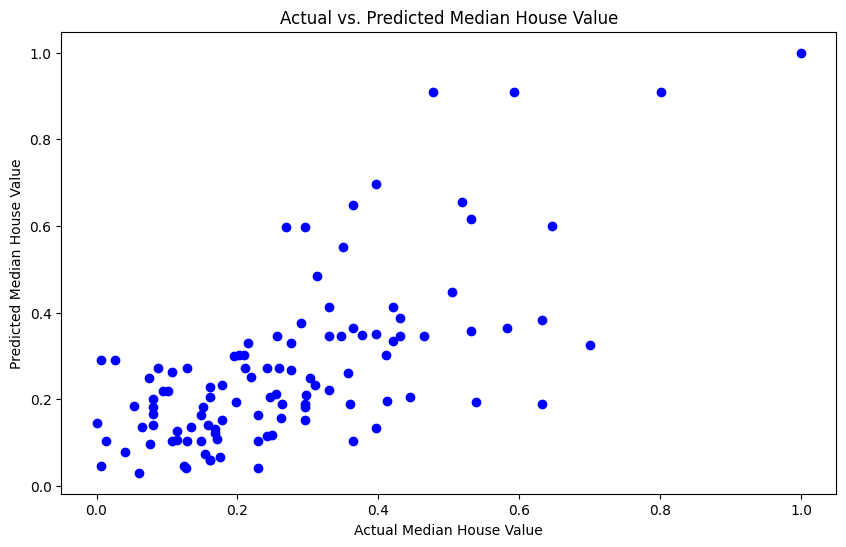

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, color='blue')
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()
